#### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from PIL import Image
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

#### 讀取資料夾中的資料

In [2]:
path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
title, data = readdir(path)

Unknown encode file :
../../107-1PythonSampleCode/week_5/task_5/2015-4.txt
../../107-1PythonSampleCode/week_5/task_5/2015-all.txt

Number of unknown encoding files : 2
Number of read files : 4
Number of files : 6


#### 顯示部份資料內容

In [3]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:50], '...', data[i][-50:-1], sep='\n', end='\n\n')

----Document : 2012-4----
股票代碼:3548
兆利科技工業股份有限公司及其子公司
合 併 財 務 報 表
民國一○一年及一○○
...
587 客 戶 乙 318,057 358,352 $ 742,941 1,132,939
~40

----Document : 2014-4----

壹、致股束報告書
回顧-O三年，由於全球經濟景氣復甦緩慢，市場需求表現平淡，依Digitimes

...
及截至年報刊印日止之處理情形:無。

（十三）其他重要風險及因應措泥:無。七、其他重要事項:無。


----Document : 2016-4----

壹、致股東報告書
回顧一O五年,由於全球筆電品牌廠面臨關鍵零組件缺貨及漲價壓力,抑制筆記 型電腦整
...
款所定對股東權
益或證券價格有重大影響之事項:無。
- 221 -
_______________

----Document : 2016-all----
一???五年度 年 報
中華民國一???六年六月六日刊印
本年報內容及本公司相關資訊可至下列網址查詢
...
款所定對股東權
益或證券價格有重大影響之事項:無。
- 221 -
_______________



#### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [4]:
savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.934 seconds.
Prefix dict has been built succesfully.


#### 新增詞彙至自定義停止詞彙中

In [5]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','但','中','可','認','我','無','彙',
             '列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於','較',
             '請','再','經','也','在','依','到','等','或','認列','為','按','比','仍','係','後','及',
             '與','以','時','該','的','並','更','註','例如','可能','由於','因此','附註','部分','事項',
             '各位','晶華','品牌','集團','幅度','資產','新','台幣','營業','受到','提供','使用','本年',
             '說明','現金','成本','營業外','收入','結轉','分攤','其他','影響','帳金額','本會','計師',
             '之會計','報表','會計師','財務','詳合','結果','預測','如下','之一','附註','附','註','其中',
             '併','合','因為','查核','報告','性事','增加','會計','相對','仟元','金額','權益','能力',
             '利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金',
             '評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算',
             '資金','評估','人次','重大','資訊','總額','民國','估計','','一副','公司','年度','包括',
             '正確性','正','確性','減損','共為','預估','預算','維持','公開','整體','表示','特性','市場',
             '科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區',
             '總資產','執行','程序','測試','稅後淨利','股份有限公司']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [6]:
stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '用', '淨', '利', '值']

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [7]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ','.join(jieba.cut(data[i], cut_all=False))

Number of word in document (2012-4) :  2856
[('1', 244), ('○', 189), ('3', 168), ('2', 143), ('兆利', 112), ('科技', 97), ('有限公司', 87), ('應', 71), ('4', 69), ('USD', 68)]
Number of word in document (2014-4) :  4229
[('\t', 6817), ('1', 467), ('2', 244), ('0', 224), ('損益', 201), ('金融', 181), ('3', 169), ('負債', 155), ('31', 151), ('準則', 130)]
Number of word in document (2016-4) :  7314
[('1', 690), ('2', 400), ('3', 309), ('有限公司', 270), ('董事', 251), ('○', 245), ('科技', 215), ('105', 212), ('________________', 196), ('000', 195)]
Number of word in document (2016-all) :  7777
[('1', 835), ('2', 524), ('3', 391), ('有限公司', 275), ('β', 274), ('董事', 259), ('○', 253), ('4', 249), ('105', 248), ('________________', 225)]


#### 顯示各文件低於閥值 (limit) 的字詞

In [8]:
limit = 1
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 2012-4----
正在, 械, 上限, 福建省, 760, 資產價款, 878, 運決, 本之淨, 361, 699, 事樞紐, 開始將, 之備, 則除, 發放, 579, 簡, 1.98, 營, 雙方間, 體, 費損, 該號, 因環境, 472, 稅資產重, 入合, 投入, 520, 696, 庫存, 090, 申請, 提繳, 計準, 保證者, 第三十七, 惟, 蓓, 貨自, 報表之擬, 資產者, 216, 司所, 決議民國, 有助, 862, 827, 而產生, 
----Document : 2014-4----
正在, 械, 上限, 福建省, 760, 資產價款, 878, 運決, 本之淨, 361, 699, 事樞紐, 開始將, 之備, 則除, 發放, 579, 簡, 1.98, 營, 雙方間, 體, 費損, 該號, 因環境, 472, 稅資產重, 入合, 投入, 520, 696, 庫存, 090, 申請, 提繳, 計準, 保證者, 第三十七, 惟, 蓓, 貨自, 報表之擬, 資產者, 216, 司所, 決議民國, 有助, 862, 827, 而產生, 
----Document : 2016-4----
正在, 械, 上限, 福建省, 760, 資產價款, 878, 運決, 本之淨, 361, 699, 事樞紐, 開始將, 之備, 則除, 發放, 579, 簡, 1.98, 營, 雙方間, 體, 費損, 該號, 因環境, 472, 稅資產重, 入合, 投入, 520, 696, 庫存, 090, 申請, 提繳, 計準, 保證者, 第三十七, 惟, 蓓, 貨自, 報表之擬, 資產者, 216, 司所, 決議民國, 有助, 862, 827, 而產生, 
----Document : 2016-all----
正在, 械, 上限, 福建省, 760, 資產價款, 878, 運決, 本之淨, 361, 699, 事樞紐, 開始將, 之備, 則除, 發放, 579, 簡, 1.98, 營, 雙方間, 體, 費損, 該號, 因環境, 472, 稅資產重, 入合, 投入, 520, 696, 庫存, 090, 申請, 提繳, 計準, 保證者, 第三十七, 惟, 蓓, 貨自, 報表之擬, 資產者, 216, 司所, 決議民國, 有助

#### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [9]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 2012-4
股,,:,3,
,利,科技,工業,股份,有限公司,及其,子公司,
,合, ,併, ,財, ,務, ,... ,, ,318,,,, ,,,,, ,$, ,742,,,1, ,1,,,,,,,
,~,40,

document : 2014-4

,壹,、,致,股束,報告,書,
,回顧,-,O,三年,，,由,於,全球,經濟景氣,,甦,緩慢,，,...十三,）,其他,重要,風險,及,因應,措泥,:,無,。,七,、,其他,重要,事項,:,無,。,
,

document : 2016-4

,壹,、,致股,東報,告書,
,回顧,一,O,五年,,,由,於,全球,筆,品牌,廠,臨關鍵,零組,...有,重大,影響,之事項,:,無,。,
,-, ,221, ,-,
,_______________

document : 2016-all
一,?,?,?,五,年, ,年, ,報,
,中國,一,?,?,?,六年,六月,,刊印,
,本年,報內...有,重大,影響,之事項,:,無,。,
,-, ,221, ,-,
,_______________



#### 移除所有標點符號、非中文英文數字之資料

In [10]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff,]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [11]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 2012-4
股,,,,,利,科技,工業,股份,有限公 ... ,,,,,,,,,,,,,,,,,,,

document : 2014-4
,壹,,致,股束,報告,書,,回顧,,, ... 無,,七,,其他,重要,事項,,無,,

document : 2016-4
,壹,,致股,東報,告書,,回顧,一,, ... 大,影響,之事項,,無,,,,,,,,

document : 2016-all
一,,,,五,年,,年,,報,,中國,一 ... 大,影響,之事項,,無,,,,,,,,



#### 初始化 TFIDF 物件，用以計算 tfidf

In [12]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.3, analyzer = 'word', stop_words = stopword)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙 

In [13]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '主要', '影響', '市場', '評估', '“', '‧', '~', '發生', '查核', '中', '人次', '關鍵', '判斷', '結果', '一副', '｜', '+', '估計', '各位', '對', '【', '預測', '開關鍵', '係', '意見', '『', '本會', '～', '=', '公開', '相對', '故', '」', '】', '收入', '〗', '｣', '與', '＾', '資訊', '並', '佔', '｝', '說明', '〕', '｛', '上', '＞', '因為', '整體', '､', '更', '＜', '附註', '財務', '值', '正確', '〾', '@', '結轉', '}', '’', '＂', '；', '認', '「', '維持', '減損', '特性', '｟', '將', '後', '列', '分攤', '權益', '等', '利', '—', '＆', '重要', '＿', '於', '彙', '詳合', '＇', '請', '以', '台幣', ' ', '／', '〚', '〝', '＊', '|', '附', '正確性', '支出', '註', ',', '［', '，', '金額', '用', '&', '„', '＝', '^', '我', '由於', '本', '*', '增加', '三', '模型', '?', '.', '其中', '重大', '〿', '可', '到', '之', '〞', '］', '因應', '營業', '科目', '集團', '‛', '[', '之會計', '二', '使用', '因此', '已', '計師', '但', '幅度', '會計師', '–', '晶華', '評價', '》', '品牌', '〜', '股份有限公司', '仟元', '例如', '計算', '報表', '經', '〟', '表示', '及', '六', '%', '由', '地區', '？', '〘', '〙', '率', '日', '五', ')', '事項', '｠', '帳金額', '…', '四', '﹏', ':', '同期', '＃', '總額', '總資產', '提供', '再', '稅後淨利', '資金', '

#### 計算 TFIDF 詞頻矩陣

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

#### 顯示 TFIDF 詞頻矩陣大小

In [15]:
tfidf_matrix.shape

(4, 3814)

#### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [16]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一些', '一倍', '一億元', '一千', '一口', '一報', '一大', '一字', '一季', '一客', '一對象', '一年', '一新', '一方', '一日', '一旦', '一月', '一有關', '一未來', '一業', '一次', '一步', '一波', '一環', '一百七', '一直', '一經', '一致', '一般', '一計算', '一遭', '一部', '一部分', '一龍', '七年', '七日', '七月', '七路', '七點', '三分', '三年', '三方', '三日', '三星', '三月', '三種', '三線', '三親', '三項', '上不斷']


#### 顯示 TFIDF > 閥值 (limit) 的資料

In [17]:
limit = 0.1
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if tfidf_matrix[i,j] > limit:
              print(words[j], tfidf_matrix[i,j])

----Document : 2012-4----
一年 0.1568382287940865
一日 0.18564525040932686
上海 0.16644056933249993
交易 0.17284212969144225
休金 0.12483042699937495
價值 0.1344327675377884
加價 0.14877051815639022
千元 0.1824444702298557
及其 0.16003900897355763
子公司 0.17924369005038454
工業 0.14403510807620187
所得 0.188846030588798
投資 0.1696413495119711
損益 0.11842886664043265
旺星 0.10242496574307688
有限公司 0.2784678756139903
本期 0.11842886664043265
準則 0.10882652610201919
科技 0.3104756774087018
股份 0.16323978915302878
認股 0.10242496574307688
費用 0.10242496574307688
金融 0.17284212969144225
銷貨 0.1536374486146153
----Document : 2014-4----
三年 0.1306112074591931
交易 0.14617946280051328
價值 0.19019048385873233
千元 0.11317119700684898
報導 0.1430358184392119
子公司 0.11002755264554762
客戶 0.1115993748261983
所得 0.17132861769092417
投資 0.1587540402457187
損失 0.13203306317465716
損益 0.3190799026720881
有限公司 0.13832035189725986
未來 0.10059661956164354
準則 0.20433688348458845
相關 0.10216844174229422
管理 0.11474301918749967
衡量 0.19490595040068437
計畫 0.14460764

#### 顯示文件相似性矩陣

In [18]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1.         0.68797131 0.7494996  0.74168717]
 [0.68797131 1.         0.86429418 0.85179199]
 [0.7494996  0.86429418 1.         0.98305029]
 [0.74168717 0.85179199 0.98305029 1.        ]]


#### 初始化 Count_vectorizer 物件，用以計算字頻

In [19]:
count_vectorizer = CountVectorizer(min_df=0.3, analyzer = 'word', stop_words = stopword)

#### 計算詞頻矩陣

In [20]:
count_matrix = count_vectorizer.fit_transform(data)

#### 顯示詞頻矩陣大小 (理論上與 TFIDF 詞頻矩陣相同)

In [21]:
count_matrix.shape

(4, 3814)

In [22]:
count_matrix.toarray()

array([[ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       [ 2,  1,  4, ...,  1,  1,  1],
       [ 2,  1,  4, ...,  1,  1,  1]], dtype=int64)

In [23]:
countframe = pd.DataFrame(count_matrix.toarray().T, index = count_vectorizer.get_feature_names(), columns = title)
countframe.head(10)

,2012-4,2014-4,2016-4,2016-all
一些,0,0,2,2
一倍,0,0,1,1
一億元,10,4,4,4
一千,0,1,1,1
一口,0,0,1,1
一報,0,5,3,3
一大,0,0,1,1
一字,0,0,1,1
一季,0,0,1,3
一客,0,2,2,2


#### 初始化 WordCloud 物件

In [24]:
font = r"/home/dongdong/.local/share/fonts/msjh.ttf"
mask = np.array(Image.open("./cloud.png"))
wordcloud = WordCloud(font_path=font, background_color = 'white', mask = mask)

#### 顯示整體詞庫的字詞頻率及前十名

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text yticklabel objects>)

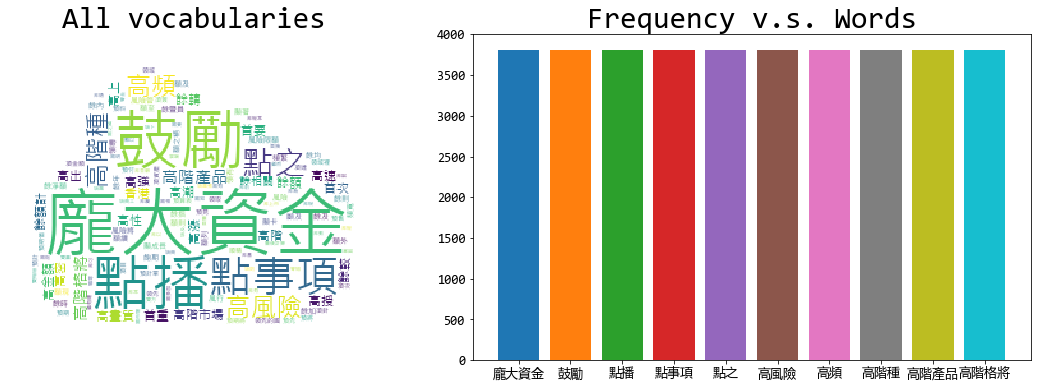

In [25]:
wordDict = count_vectorizer.vocabulary_

f = plt.figure(figsize=(20,6))
f.subplots_adjust(wspace = 0)

f.add_subplot(121)
wordcloud.fit_words(wordDict)
plt.title('All vocabularies', fontsize = 30)
plt.axis("off")
plt.imshow(wordcloud)

f.add_subplot(122)
sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
for i in range(10):
    plt.bar(sort[i][0], sort[i][1])
plt.title('Frequency v.s. Words', fontsize = 30)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#### 顯示各個文件的字詞頻率及前十名

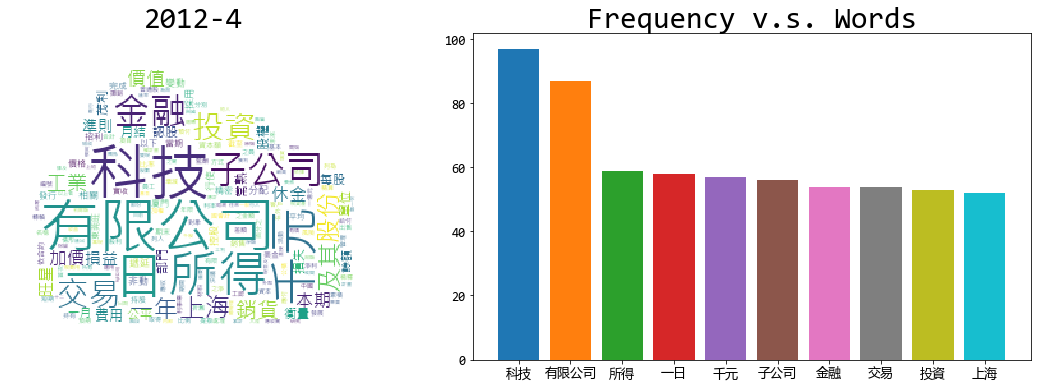

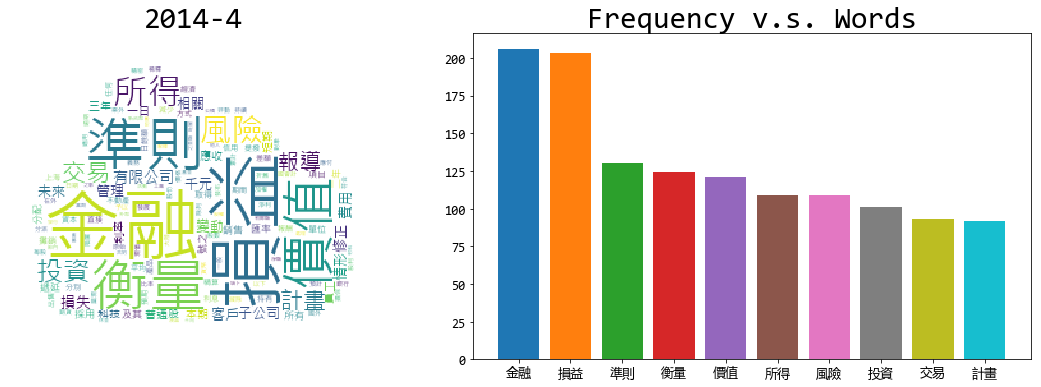

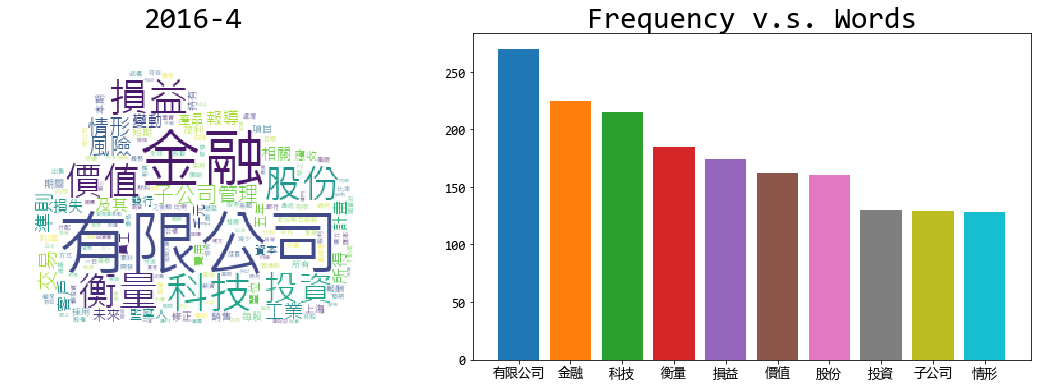

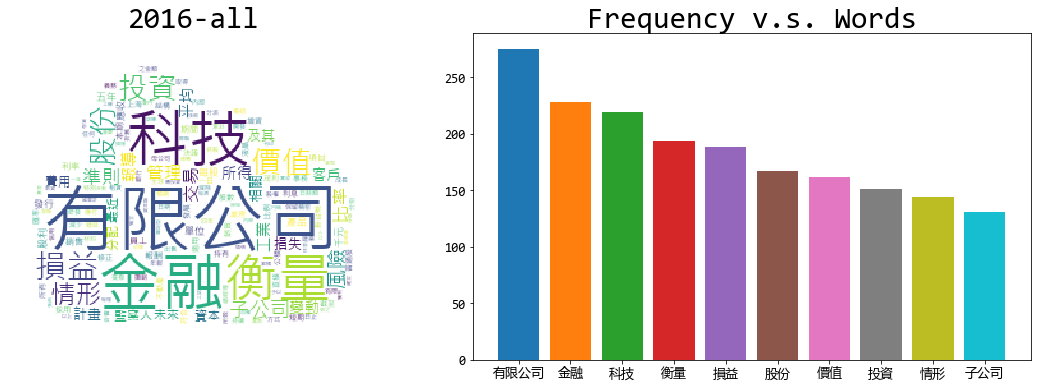

In [26]:
wordDict_key = count_vectorizer.get_feature_names()

for i in range(len(data)):
    wordDict_value = count_matrix.toarray()[i]

    wordDict = dict(zip(wordDict_key, wordDict_value))
    
    f = plt.figure(figsize=(20,6))
    f.subplots_adjust(wspace = 0)

    f.add_subplot(1, 2, 1)
    wordcloud.fit_words(wordDict)
    plt.title('{0}'.format(title[i]), fontsize = 30)
    plt.axis("off")
    plt.imshow(wordcloud)

    f.add_subplot(1, 2, 2)
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    for i in range(10):
        plt.bar(sort[i][0], sort[i][1])
    plt.title('Frequency v.s. Words', fontsize = 30)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)